# MNIST 데이터셋 CSV 형태로 가져오기
+ 실습에 사용할 MNIST dataset을 kaggle에서 csv 형태로 받아서 학습시킨다.

In [25]:
import pandas as pd
train_dataset_path = r"D:\NoShare\MNIST_CSV\mnist_train.csv"
test_dataset_path = r"D:\NoShare\MNIST_CSV\mnist_test.csv"

train_dataset = pd.read_csv(train_dataset_path)
test_dataset = pd.read_csv(test_dataset_path)

In [26]:
print("28 X 28 픽셀값이 저장된 CSV")
train_dataset.head()

28 X 28 픽셀값이 저장된 CSV


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Image와 Label 분리한다.
train_images = (train_dataset.iloc[:, 1:].values).astype("float32")
train_labels = train_dataset["label"].values
test_images = (test_dataset.iloc[:, 1:].values).astype("float32")

In [35]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [37]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Train image와 Valid image 분리하기

In [38]:
from sklearn.model_selection import train_test_split

train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, 
    train_labels, 
    stratify=train_labels,  # 분포를 train_labels의 분포로 분리하겠다.
    random_state=42,        # 랜덤 시드를 생성하여 분리
    test_size=0.2,          # test_size를 결정
)

In [39]:
"""
이미지 각각 48000, 12000, 10000개
이미지의 크기 28 * 28 = 784를 의미한다.

train_images.shape : (48000, 784)
valid_images.shape : (12000, 784)
test_images.shape : (10000, 784)
"""
print(f"train_images.shape : {train_images.shape}")
print(f"valid_images.shape : {valid_images.shape}")
print(f"test_images.shape : {test_images.shape}")
print()
print(f"train_labels.shape : {train_labels.shape}")
print(f"valid_labels.shape : {valid_labels.shape}")

train_images.shape : (48000, 784)
valid_images.shape : (12000, 784)
test_images.shape : (10000, 784)

train_labels.shape : (48000,)
valid_labels.shape : (12000,)


In [41]:
# Reshape을 통해서 이미지의 형태로 바꿔준다.
train_images = train_images.reshape(train_images.shape[0], 28, 28)
valid_images = valid_images.reshape(valid_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

print(f"train_images.shape : {train_images.shape}")
print(f"valid_images.shape : {valid_images.shape}")
print(f"test_images.shape : {test_images.shape}")

train_images.shape : (48000, 28, 28)
valid_images.shape : (12000, 28, 28)
test_images.shape : (10000, 28, 28)


In [58]:
from matplotlib import pyplot as plt
import numpy as np 

# image 시각화 함수
def imshow(img, label):
    plt.imshow(img, cmap=plt.get_cmap("gray"))
    plt.title(label)
    plt.show()

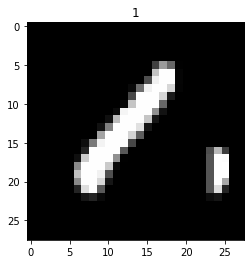

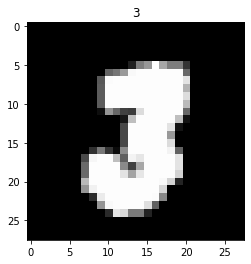

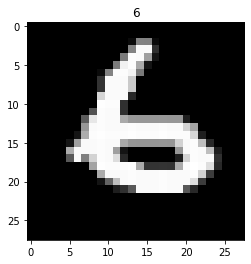

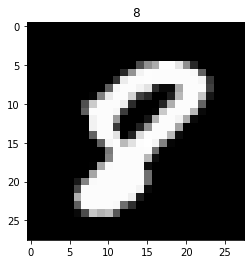

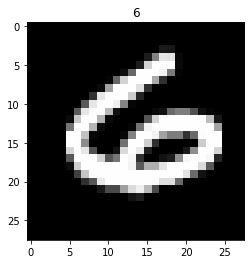

In [59]:
# 이미지 확인하기
for i in range(5):
    imshow(train_images[i], train_labels[i])

In [60]:
import torch
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64

# Tensor로 변환해주고, DataLoader를 붙여서 미니배치모드로 학습할 수 있도록 해준다.
train_image_tensors = torch.tensor(train_images)
train_label_tensors = torch.tensor(train_labels)
train_tensor = TensorDataset(train_image_tensors, train_label_tensors)
train_loader = DataLoader(train_tensor, batch_size=batch_size, num_workers=0, shuffle=True)

valid_image_tensors = torch.tensor(valid_images)
valid_label_tensors = torch.tensor(valid_labels)
valid_tensor = TensorDataset(valid_image_tensors, valid_label_tensors)
valid_loader = DataLoader(valid_tensor, batch_size=batch_size, num_workers=0, shuffle=True)

test_image_tensors = torch.tensor(test_images)

In [62]:
import torch 

# GPU 사용 여부를 체크
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

print(DEVICE)

cuda


In [63]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# MLP 모델 클래스 생성
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(28 * 28, 128)
        self.hidden_layer = nn.Linear(128, 128)
        # MNIST 의 클래스가 총 10개이므로 10개로 Output을 만듬
        self.output_layer = nn.Linear(128, 10)
    
    def forward(self, x):
        # Image를 1차원 벡터로 쭉 핀다.
        x = x.view(-1, 28 * 28)
        x = F.relu(self.input_layer(x))
        x = F.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        x = F.log_softmax(x, dim=1)
        return x

# 학습률
learning_rate = 0.001

# model을 DEVICE에서 연산하겠다.
model = MLP().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# model의 형태를 보여줌
print(model)

MLP(
  (input_layer): Linear(in_features=784, out_features=128, bias=True)
  (hidden_layer): Linear(in_features=128, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)


In [65]:
def train(epoch, model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")
                    
def evaluate(model, valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            valid_loss += F.cross_entropy(output, target, reduction = "sum").item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(target.view_as(prediction)).sum().item()

    valid_loss /= len(valid_loader.dataset)
    valid_accuracy = 100. * correct / len(valid_loader.dataset)
    return valid_loss, valid_accuracy

In [66]:
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(epoch, model, train_loader, optimizer)
    valid_loss, valid_accuracy = evaluate(model, valid_loader)
    print(f"[EPOCH: {epoch}], \tValidation Loss: {valid_loss:.4f}, \tValidation Accuracy: {valid_accuracy:.2f} %testset_prediction\n")

Train Epoch: 1 [0/48000 (0%)]	Loss: 17.387749
Train Epoch: 1 [6400/48000 (13%)]	Loss: 0.349344
Train Epoch: 1 [12800/48000 (27%)]	Loss: 0.234877
Train Epoch: 1 [19200/48000 (40%)]	Loss: 0.240873
Train Epoch: 1 [25600/48000 (53%)]	Loss: 0.209026
Train Epoch: 1 [32000/48000 (67%)]	Loss: 0.138386
Train Epoch: 1 [38400/48000 (80%)]	Loss: 0.064620
Train Epoch: 1 [44800/48000 (93%)]	Loss: 0.128987
[EPOCH: 1], 	Validation Loss: 0.2140, 	Validation Accuracy: 93.96 %testset_prediction

Train Epoch: 2 [0/48000 (0%)]	Loss: 0.153492
Train Epoch: 2 [6400/48000 (13%)]	Loss: 0.190456
Train Epoch: 2 [12800/48000 (27%)]	Loss: 0.176359
Train Epoch: 2 [19200/48000 (40%)]	Loss: 0.187704
Train Epoch: 2 [25600/48000 (53%)]	Loss: 0.170309
Train Epoch: 2 [32000/48000 (67%)]	Loss: 0.281601
Train Epoch: 2 [38400/48000 (80%)]	Loss: 0.125086
Train Epoch: 2 [44800/48000 (93%)]	Loss: 0.245844
[EPOCH: 2], 	Validation Loss: 0.1912, 	Validation Accuracy: 94.66 %testset_prediction

Train Epoch: 3 [0/48000 (0%)]	Loss: 0

In [67]:
def testset_prediction(model, test_loader):
    model.eval()
    result = []
    with torch.no_grad():
        for data in test_image_tensors:
            data = data.to(DEVICE)
            output = model(data)
            prediction = output.max(1, keepdim = True)[1]
            result.append(prediction.tolist())
    return result

In [68]:
# 테스트 데이터셋을 모델로 예측해보고 결과 확인
test_predict_result = testset_prediction(model, test_image_tensors)
test_predict_result[:5]

[[[7]], [[2]], [[1]], [[0]], [[4]]]

In [69]:
import numpy as np
from collections import Counter

# 예측결과의 분포 확인
Counter(np.squeeze(test_predict_result)).most_common()

[(1, 1133),
 (2, 1056),
 (3, 1055),
 (8, 1015),
 (7, 992),
 (9, 981),
 (4, 974),
 (0, 960),
 (6, 933),
 (5, 901)]

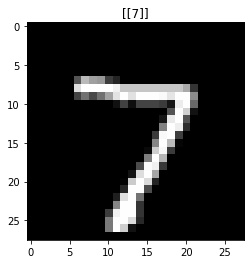

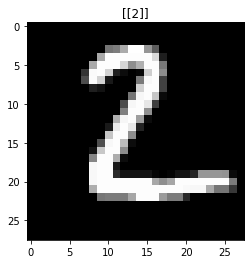

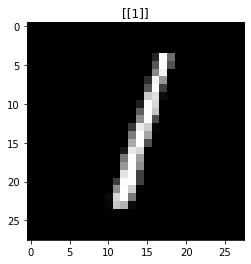

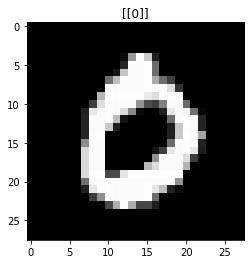

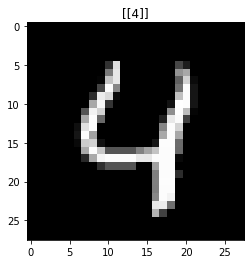

In [70]:
# 예측결과 표시
for i in range(5):
    imshow(test_images[i], test_predict_result[i])